In [1]:
import pandas as pd
import numpy as np
import ccxt
import mplfinance as mpf

In [2]:
#ccxt es una libreria que permite hacer análisis, visualizaciones, trading algorítmico
#la libreria mplfinance se usa para la graficacion de las velas y el volumen 

In [3]:
exchage = ccxt.binance({
    #funciona como limitante de velocidad para la consulta de la api
    'enableRatelimit':True,
})

In [4]:
#extracion de datos del indicador ohlcv Open, High, Low, Close y volumen
bars = exchage.fetch_ohlcv('BTC/USDT',timeframe='1M')

In [5]:
df = pd.DataFrame(bars,columns=['time','open','high','low','close','volume'])
print(df)

             time      open      high       low     close        volume
0   1501545600000   4261.48   4745.42   3400.00   4724.89  1.001564e+04
1   1504224000000   4689.89   4939.19   2817.00   4378.51  2.763419e+04
2   1506816000000   4378.49   6498.01   4110.00   6463.00  4.162639e+04
3   1509494400000   6463.00  11300.03   5325.01   9838.96  1.084880e+05
4   1512086400000   9837.00  19798.68   9380.00  13716.36  4.084767e+05
5   1514764800000  13715.65  17176.24   9035.00  10285.10  8.166756e+05
6   1517443200000  10285.10  11786.01   6000.01  10326.76  1.243941e+06
7   1519862400000  10325.64  11710.00   6600.10   6923.91  1.235326e+06
8   1522540800000   6922.00   9759.82   6430.00   9246.01  1.110964e+06
9   1525132800000   9246.01  10020.00   7032.95   7485.01  9.144764e+05
10  1527811200000   7485.01   7786.69   5750.00   6390.07  9.422498e+05
11  1530403200000   6391.08   8491.77   6070.00   7730.93  1.102510e+06
12  1533081600000   7735.67   7750.00   5880.00   7011.21  1.408

In [6]:
#comprobando tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    54 non-null     int64  
 1   open    54 non-null     float64
 2   high    54 non-null     float64
 3   low     54 non-null     float64
 4   close   54 non-null     float64
 5   volume  54 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.7 KB


In [7]:
#convirtiendo de mili-segundos a fecha normal y convirtiendola en indice
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.index = pd.DatetimeIndex(df['time'])
print(df)

                 time      open      high       low     close        volume
time                                                                       
2017-08-01 2017-08-01   4261.48   4745.42   3400.00   4724.89  1.001564e+04
2017-09-01 2017-09-01   4689.89   4939.19   2817.00   4378.51  2.763419e+04
2017-10-01 2017-10-01   4378.49   6498.01   4110.00   6463.00  4.162639e+04
2017-11-01 2017-11-01   6463.00  11300.03   5325.01   9838.96  1.084880e+05
2017-12-01 2017-12-01   9837.00  19798.68   9380.00  13716.36  4.084767e+05
2018-01-01 2018-01-01  13715.65  17176.24   9035.00  10285.10  8.166756e+05
2018-02-01 2018-02-01  10285.10  11786.01   6000.01  10326.76  1.243941e+06
2018-03-01 2018-03-01  10325.64  11710.00   6600.10   6923.91  1.235326e+06
2018-04-01 2018-04-01   6922.00   9759.82   6430.00   9246.01  1.110964e+06
2018-05-01 2018-05-01   9246.01  10020.00   7032.95   7485.01  9.144764e+05
2018-06-01 2018-06-01   7485.01   7786.69   5750.00   6390.07  9.422498e+05
2018-07-01 2

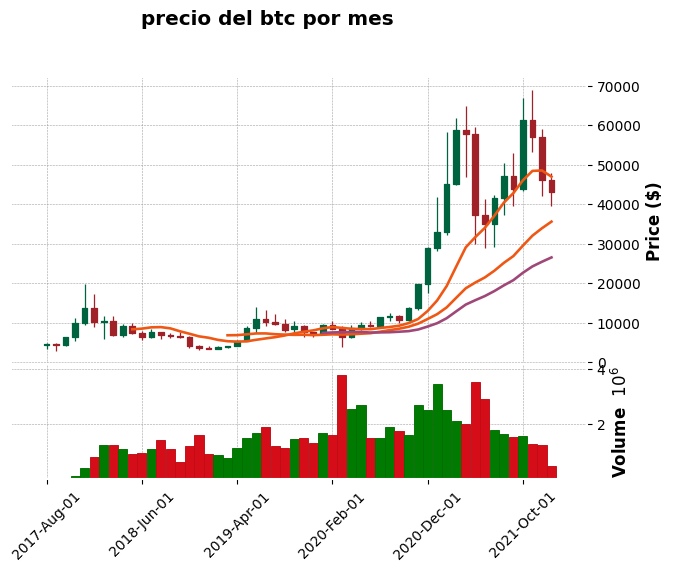

In [8]:
#creando grafico de veleas
mpf.plot(
    df,
    type='candle',
    style='charles',
    title= 'precio del btc por mes',
    ylabel='Price ($)',
    volume=True,
    mav=(10,20,30)
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86abaa8d-0cc6-4b4e-b8a6-c45c25d828b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>